# KNN - 피마인디언 유방암 데이터



# 데이터 스케일링 - breast_cancer()로 확인
피처 (feature) 들마다 데이터 값의 범위가 다르기 때문에 범위 차이가 클경우 데이터를 갖고 모델링할 때 0으로 수렴하거나 무한으로 발산 <br />
모든 피처들의 데이터 분포나 범위를 동일하게 조정
- StandardScaler(): 평균이 0이고 분산 1인 정규분포
- MinMaxScaler(): 최댓값이 1이고 최솟값이 0, 이상치에 취약
- RobustScaler(): 중앙값 0, IQR=1, 이상치 영향 최소화하고 더 넓게 분포됨
- Normalizer(): 열을 대상으로 함, 한 행의 모든 피처들 사이에 유클리드 거리가 1이 되도록 데이터값 생성, 과대적합 확률 낮춤

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer() # 유방암 데이터

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("모델의 정확도: ", round(dtc.score(X_test, y_test), 4))

모델의 정확도:  0.9035


## StandardScaler

In [3]:
# StandardScaler: 평균이 0이고 분산이 1인 정규분포로 만드는 것
# 표준편차란 평균으로부터 얼마나 떨어져있는지를 구한 것
from sklearn.preprocessing import StandardScaler

#  Standardization 평균 0 / 분산 1
std = StandardScaler()

In [4]:
# 교차검증
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


In [5]:
X_train

array([[1.916e+01, 2.660e+01, 1.262e+02, ..., 1.872e-01, 3.258e-01,
        9.720e-02],
       [1.831e+01, 1.858e+01, 1.186e+02, ..., 1.571e-01, 3.206e-01,
        6.938e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       ...,
       [1.795e+01, 2.001e+01, 1.142e+02, ..., 1.185e-01, 4.882e-01,
        6.111e-02],
       [1.955e+01, 2.877e+01, 1.336e+02, ..., 1.941e-01, 2.818e-01,
        1.005e-01],
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02]])

In [6]:
X_train_scaled

array([[ 1.40381088,  1.79283426,  1.37960065, ...,  1.044121  ,
         0.52295995,  0.64990763],
       [ 1.16565505, -0.14461158,  1.07121375, ...,  0.5940779 ,
         0.44153782, -0.85281516],
       [-0.0307278 , -0.77271123, -0.09822185, ..., -0.64047556,
        -0.31161687, -0.69292805],
       ...,
       [ 1.06478904,  0.20084323,  0.89267396, ...,  0.01694621,
         3.06583565, -1.29952679],
       [ 1.51308238,  2.3170559 ,  1.67987211, ...,  1.14728703,
        -0.16599653,  0.82816016],
       [-0.73678981, -1.02636686, -0.74380549, ..., -0.31826862,
        -0.40713129, -0.38233653]])

In [7]:
X_train_scaled.shape

(455, 30)

In [8]:
X_train_scaled_ss = X_train_scaled.reshape(13650, 1)
X_train_data = X_train.reshape(13650, 1)

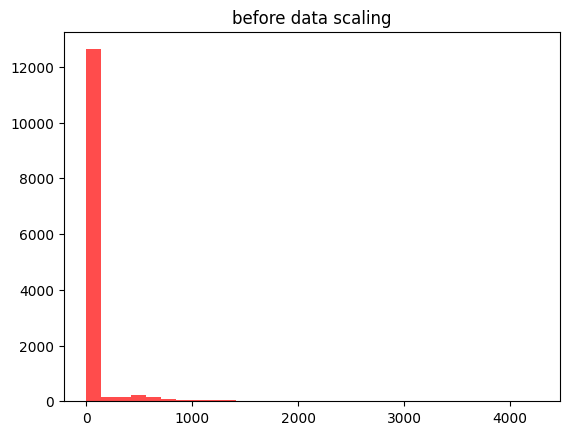

In [9]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

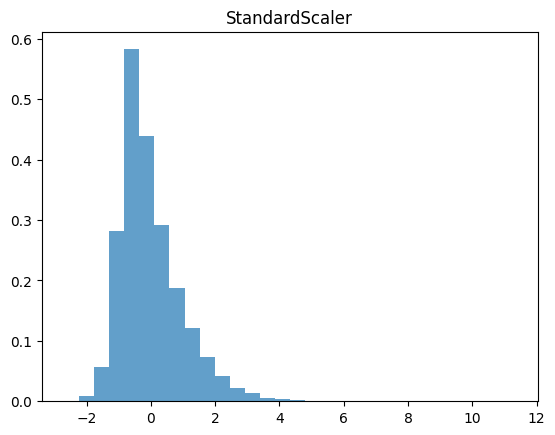

In [10]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

## MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

#  MinMaxScaler 최솟값 0 / 최댓값 1
mms = MinMaxScaler()

In [12]:
# 교차검증
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


In [13]:
X_train_scaled # 0과 1 사이로 분포

array([[0.56168275, 0.7081761 , 0.55664674, ..., 0.64329897, 0.33372758,
        0.27653155],
       [0.52005485, 0.37190776, 0.50256191, ..., 0.53986254, 0.32347723,
        0.09405746],
       [0.31093589, 0.26289308, 0.29746655, ..., 0.25611684, 0.22866154,
        0.11347239],
       ...,
       [0.50242421, 0.43186583, 0.47124964, ..., 0.40721649, 0.65385374,
        0.03981372],
       [0.5807826 , 0.79916143, 0.60930828, ..., 0.66701031, 0.24699389,
        0.29817657],
       [0.18752143, 0.21886792, 0.18424424, ..., 0.33017182, 0.2166371 ,
        0.1511872 ]])

In [14]:
X_train_scaled_mms = X_train_scaled.reshape(13650, 1)

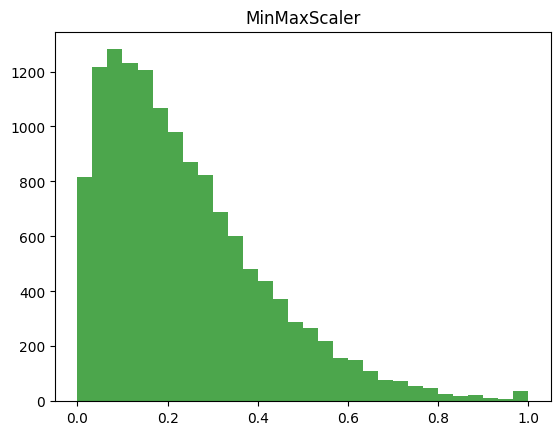

In [15]:
#스케일링 후의 데이터 값들이 0과 1사이에 분포
plt.hist(X_train_scaled_mms, bins=30, color='green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

## MaxAbsScaler

In [16]:
# MaxAbsScaler() : 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization 이상치에 취약
from sklearn.preprocessing import MaxAbsScaler

#절대값
scaler = MaxAbsScaler()

In [17]:
#교차검증시
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.8947


In [18]:
X_train_scaled_mas = X_train_scaled.reshape(13650, 1)

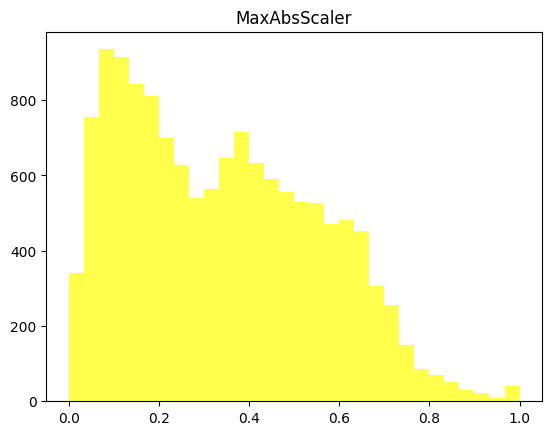

In [19]:
# 모두 양수이기 때문에 0과 1 사이의 범위에만 데이터가 존재
plt.hist(X_train_scaled_mas, bins=30, color='yellow', alpha = 0.7)
plt.title('MaxAbsScaler')
plt.show()

## RobustScaler

In [20]:
# RobustScaler: 중앙값 0, IQR=1, 이상치 영향 최소화하고 더 넓게 분포
from sklearn.preprocessing import RobustScaler

#중앙값0/IQR 1
rbs = RobustScaler()

In [21]:
#교차검증시
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.886


# SVM

In [22]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
import pandas as pd
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features :', dfX.shape)
print('label :', dfy.shape)

features : (569, 30)
label : (569, 1)


In [24]:
dfX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
dfy.head()

,target
0,0
1,0
2,0
3,0
4,0


In [26]:
dfX.info()
# texture: 조직을 찍는 X선

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [27]:
# 결측값 확인
dfX.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [28]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


In [29]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

In [30]:
X_test = sc.transform(X_test)
y_test = y_test.values

In [31]:
y_train = y_train.flatten()

In [32]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
y_test = y_test.flatten()
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [34]:
from sklearn.metrics import *

print("정확도 :", accuracy_score(y_test, y_pred))

정확도 : 0.956140350877193
